In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('D:/GIT_Repositories/pandas/ETH_1h.csv')

In [7]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [8]:
# to know no of rows & columns

df.shape

(23674, 7)

In [9]:
df.loc[0, 'Date']   # fetch date of 1st row

'2020-03-13 08-PM'

In [11]:
# get weekday name for the above date ???

df.loc[0, 'Date'].day_name()   # df.loc[0, 'Date']  ---- returns a string hence error, it should be datetime object

AttributeError: 'str' object has no attribute 'day_name'

In [13]:
#  CONVERT the 'Date' column ---> datetime  --- using PANDAS --- to_datetime()

df['Date'] = pd.to_datetime(df['Date'])     # FAILS --- bks the date time values are in different format than supported by pandas

# here the pandas fails to convert the date automatically without we telling it how our date is formatted...


C:\Users\MeghaPrateek\AppData\Local\Temp\ipykernel_10552\1948765982.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])     # FAILS --- bks the date time values are in different format than supported by pandas


DateParseError: Unknown datetime string format, unable to parse: 2020-03-13 08-PM, at position 0

In [14]:
# in the above the pandas fails to convert the date automatically without we telling it how our date is formatted...

# Let's SPECIFY the format of the date in data frame

# Datetime Formatting Codes - http://bit.ly/python-dt-fmt

# Pandas Date Offset Codes - http://bit.ly/pandas-dt-fmt

df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %I-%p')   # format --- tells pandas how to interpret our date

In [17]:
df['Date']   # now got converted to date time object.   it converted 8pm t0 20 and so on

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [18]:
# now lets to get the day name

df.loc[0, 'Date'].day_name() 

'Friday'

# Can we parse & conver the df['Date'] to pandas datetime format while loading the dataframe??????

Specify the column name and format to interpert the date

In [110]:
df1 = pd.read_csv('D:/GIT_Repositories/pandas/ETH_1h.csv', parse_dates=['Date'], date_format='%Y-%m-%d %I-%p')

In [111]:
df1

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [112]:
df1.loc[0, 'Date'].day_name() 

'Friday'

### instead of on a single value can we get the day name for all dates in the series?

<'data_Frame'>.dt.day_name()

In [113]:
df1['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

### if we want to have the day name stored as a seperate column in the data frame??

In [114]:
df1['DayOfWeek'] = df1['Date'].dt.day_name()

In [115]:
df1.head()

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [46]:
df1.tail()

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.0,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.0,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.0,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.0,274.83,824362.87,Saturday
23673,2017-07-01 11:00:00,ETHUSD,279.98,279.99,272.1,275.01,679358.87,Saturday


In [48]:
df1.shape

(23674, 8)

### how to know earliest and oldest dates ?? --- use min()  & max()

In [52]:
# to see earliest/oldest date  --- min()

df1['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [53]:
# to see recent date  --- max()

df1['Date'].max()

Timestamp('2020-03-13 20:00:00')

### to get the delta i.e. amount of time spent between 2 dates ---- subtract dates

In [54]:
df1['Date'].max() - df1['Date'].min()

Timedelta('986 days 09:00:00')

### How to get the details of only 2019 ???

In [56]:
# df1['Date'] >= '2019'   <=====  though 'Date' has other components like month and day, it compares only with the year

filt = ( df1['Date'] >= '2019' ) & ( df['Date'] < '2020')
df1.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


# instead of year string we can also use the actual dates.... 

In [58]:
filt = ( df1['Date'] >= pd.to_datetime('2019-01-01') ) & ( df1['Date'] < pd.to_datetime('2020-01-01') )
df1.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


# Can we make datetime as index ... since we have unique time stamps for each row ????  --- yes

In [59]:
df1.set_index(['Date'])

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [61]:
df1.set_index(['Date'], inplace=True)
df1

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [66]:
# Now with 'Date' as index --- we can access the 2019 data --- by directly specifying the year

df1.loc['2019']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


### can we data of only Jan, Feb & mar months of 2019 ??  ---- slicing

In [73]:
df1.loc['2019-01':'2019-03']

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [80]:
df1.sort_index().loc['2020-01':'2020-02']   # use sort_index()

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-01-01 00:00:00,ETHUSD,128.54,128.54,128.12,128.34,245119.91,Wednesday
2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
...,...,...,...,...,...,...,...
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday


### Can we get average closing price for ETHUSD -- between jan and feb of 2019 ????

In [82]:
df1.sort_index().loc['2020-01':'2020-02']['Close'].mean()

np.float64(195.1655902777778)

### instead of seeing hourly values for each day... can we get HIGH/MAx of entire day ???? -- 

.resample ()

Pandas Date Offset Codes - http://bit.ly/pandas-dt-fmt

In [87]:
# highest for a specific day

# Step1:  df1.loc['2020-01-01']
# Step2:  df1.loc['2020-01-01']['High']
# Step3: df1.loc['2020-01-01']['High'].max()

df1.loc['2020-01-01']['High'].max()

np.float64(132.68)

In [88]:
# to get for each day  --- by doing .resample

df1['High']

0        131.82
1        132.02
2        124.85
3        127.42
4        129.51
          ...  
23669    272.74
23670    269.90
23671    274.93
23672    275.01
23673    279.99
Name: High, Length: 23674, dtype: float64

In [95]:
df1['High'].resample('D').max()

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

In [97]:
# to verify the resuls save it in a variable and then check for the day we tested earlier

highs = df1['High'].resample('D').max()

In [98]:
# lets cross verify the result from what has been verified for day 2020-01-01

highs['2020-01-01']

np.float64(132.68)

### resampling helps plot the day-wise average graphs

In [99]:
%matplotlib inline

<Axes: xlabel='Date'>

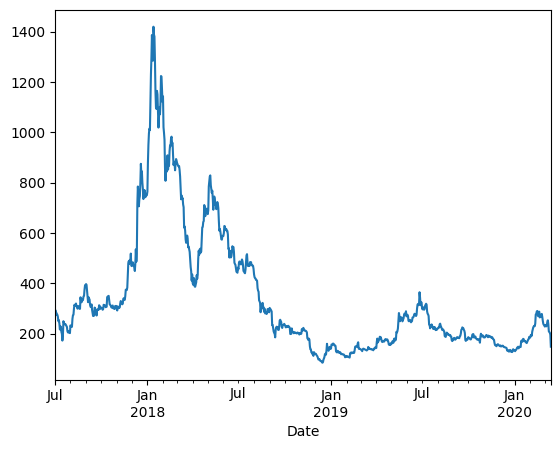

In [100]:
highs.plot()

## instead of resampling on single column like 'High'... 

## can we resample on > 1 column ----- Yes

df1.resample('W').<< aggregate function to be applied on all column >>


In [116]:
# resmaple on weekly basis  --- FIRST drop the string/object column i.e. 'DayOfWeek' -- 
# to avoid error when aggrgate function is applied on all columns

df1.drop('DayOfWeek',axis='columns', inplace=True)
df1.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [126]:
df1.resample('W').agg({'Close':'mean', 'High':'max', 'Low':'min', 'Volume':'sum'})

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'